# Bike Sharing Demand Analysis:

Goal: Analyze hourly bike rental patterns, visualize trends, and explore how hourly demand aligns (or differs) from daily summaries.

Includes Hourly and Daily Comparison

Doing exploratory data analysis on the `day.csv` and `hour.csv` datasets. It includes loading the datasets, visualizing trends, analyzing relationships between variables, and identifying irrelevant paramters.

## Libraries & Data Loading

In [70]:
import sys
import os
sys.path.append(os.path.abspath('../'))

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import * 
from dataClean import *
from visualization import dayTypeBox,dayTypeBoxNoOutlier
from analysis import *
# Load data
day_data = pd.read_csv('../data/day.csv')
hour_data = pd.read_csv('../data/hour.csv')


## Data Inspection

In [71]:
'''dataset selection'''

choice = input("Check day or hour data? (d/h) : ").strip().lower()
if choice == 'd':
    datat= day_data
    time = 'dteday'
elif choice == 'h': 
    datat= hour_data
    time = 'hr'
else:
    print("Sahi se select krlo yaar please ~.~")
    time = 'hr' #defaulted
# else:
#     print("Sahi se bta de bhai")
#     datat = hour_data #defaulted

In [72]:
datat.head() #checking initial rows

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [73]:
datat.info() #Summary of the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [74]:
datat.describe() #Statistics of dataset's column (numeric)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning 

In [75]:
# check for missing values
day_missing = day_data.isnull().sum()
hour_missing = hour_data.isnull().sum()
zx = day_missing[day_missing > 0]; zy = hour_missing[hour_missing > 0]
if(not zx.empty):
    checkNull(day_data,zx)
elif(not zy.empty):
    checkNull(hour_data,zy)
else:
    print("No missing values in both datasets")


No missing values in both datasets


## EDA

### Seperate numeric and categorical

In [76]:

ncol = datat.select_dtypes(include=['number']).columns
ccol = datat.select_dtypes(include=['object', 'category']).columns

print("\nNumeric columns:", ncol)
print("\nCategorical columns:", ccol)
# print("\nAll columns:",datat.columns)



Numeric columns: Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Categorical columns: Index(['dteday'], dtype='object')


### Corr

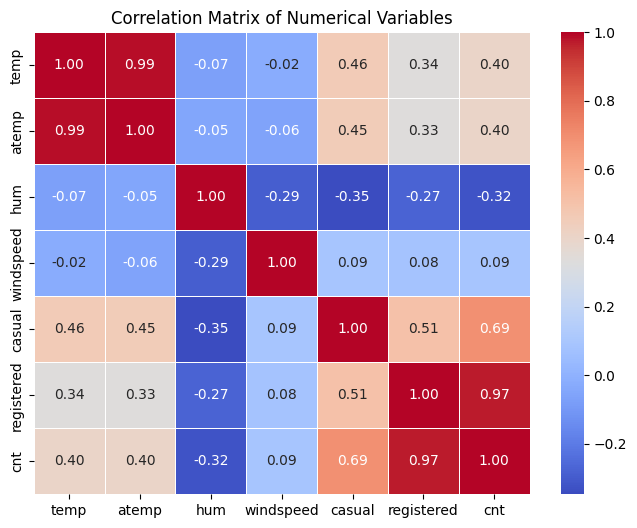

In [77]:
corr_matrix(datat)

### Analysing Basic trends

#### Average rentals by hour
analysing avg `cnt` vs `hr`

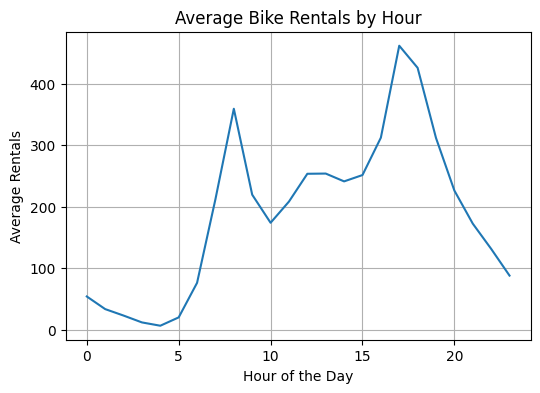

In [78]:
hourly_trend = datat.groupby(time)['cnt'].mean()
plt.figure(figsize=(6,4))
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values)
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.grid()
plt.show()

#### Seasonal Trends:
Compare bike `rentals` across `seasons`.

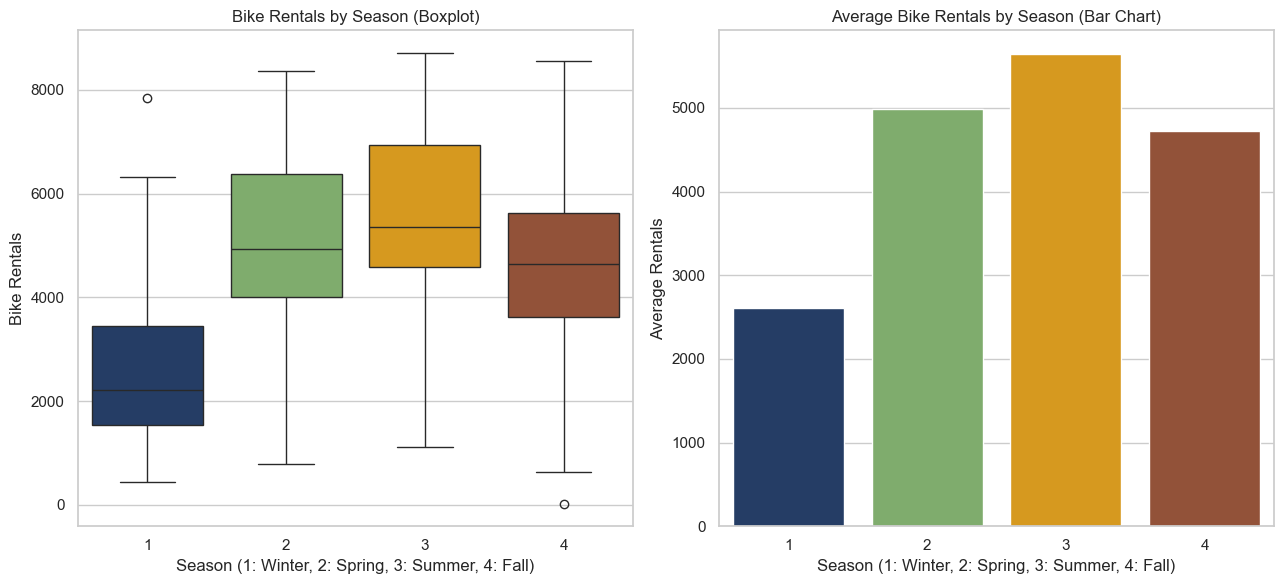

In [134]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
myPal =  ["#1B3B6F", "#7BB662", "#F4A300", "#A14B2A"]
# Boxplot for bike rentals by season
sns.boxplot(ax=axes[0], x='season', y='cnt', hue='season', data=day_data,legend=False, palette=myPal)
axes[0].set_title('Bike Rentals by Season (Boxplot)')
axes[0].set_xlabel('Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)')
axes[0].set_ylabel('Bike Rentals')

# Bar chart for average rentals by season
s_avg = day_data.groupby('season')['cnt'].mean().reset_index()
sns.barplot(ax=axes[1], x='season', y='cnt', hue='season' ,data=s_avg, palette=myPal,legend=False)
axes[1].set_title('Average Bike Rentals by Season (Bar Chart)')
axes[1].set_xlabel('Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)')
axes[1].set_ylabel('Average Rentals')

# Adjust layout
plt.tight_layout()
plt.show()

#### Rentals by Weather:
How `weathersit` affect `rentals`.

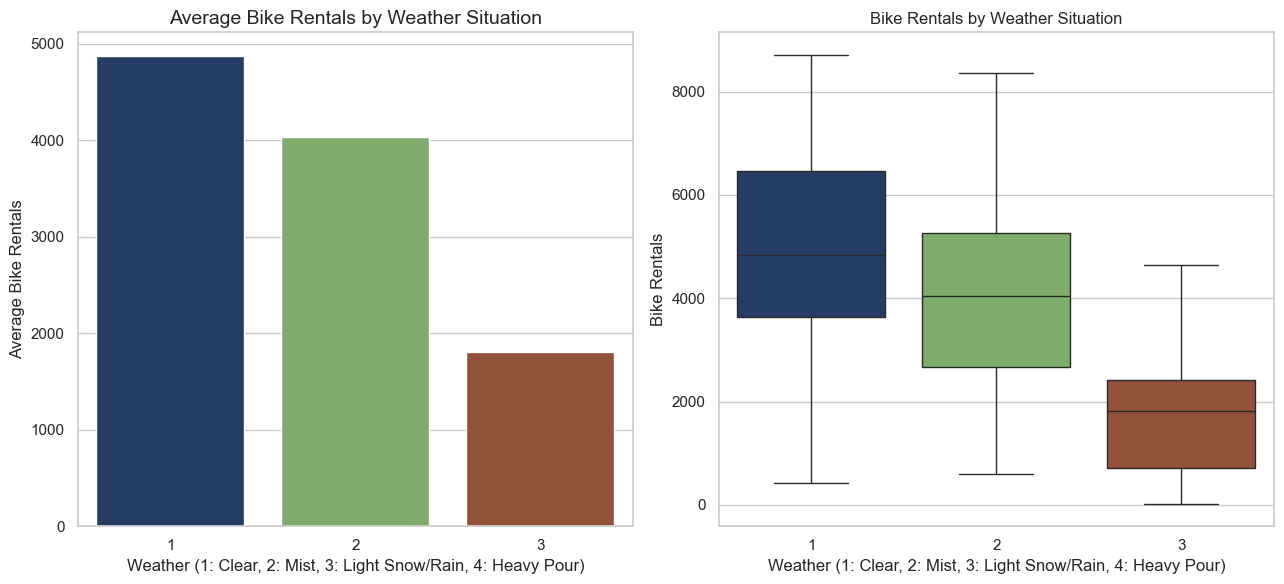

In [146]:
myPal2 = ["#1B3B6F", "#7BB662", "#A14B2A" ]
weather_avg = day_data.groupby('weathersit')['cnt'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(13, 6))
sns.barplot(x='weathersit', y='cnt', hue= 'weathersit',data=weather_avg, ax=axes[0], palette=myPal2,legend=False)
axes[0].set_title('Average Bike Rentals by Weather Situation', fontsize=14)
axes[0].set_xlabel('Weather (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Pour)', fontsize=12)
axes[0].set_ylabel('Average Bike Rentals', fontsize=12)

sns.boxplot(x='weathersit', y='cnt', hue= 'weathersit',data=day_data, ax = axes[1], palette=myPal2,legend=False)
axes[1].set_title('Bike Rentals by Weather Situation')
axes[1].set_xlabel('Weather (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Pour)')
axes[1].set_ylabel('Bike Rentals')
plt.tight_layout()
plt.show()

#### Casual vs Registered Users :
Comparing behavious `casual` and `registered`

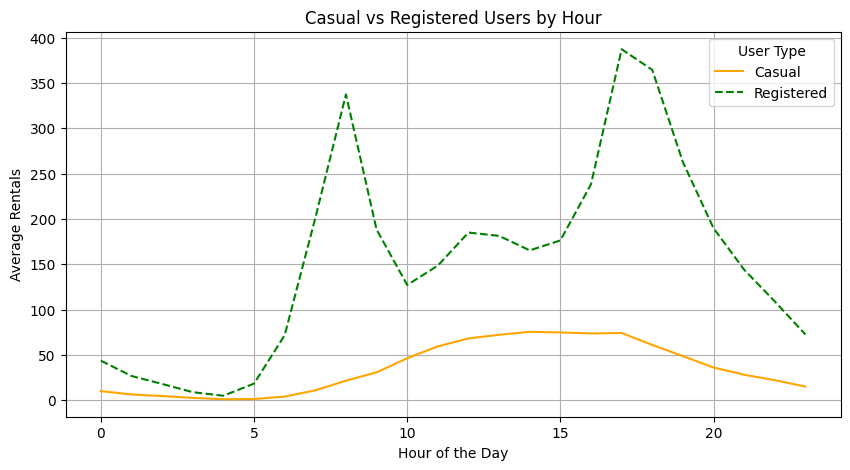

In [81]:

# Plot casual vs registered users by hour
hourly_data = datat.groupby(time)[['casual', 'registered']].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_data.index, y=hourly_data['casual'], label='Casual', linestyle='-', color='orange')
sns.lineplot(x=hourly_data.index, y=hourly_data['registered'], label='Registered', linestyle='--', color='green')

plt.title('Casual vs Registered Users by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.legend(title='User Type')
plt.grid()
plt.show()

#### Holiday vs. Working Day:

##### Compare `rentals` on `weekday` vs `holiday/weekend`

day_type
Working Day    11865
Weekend         5014
Holiday          500
Name: count, dtype: int64


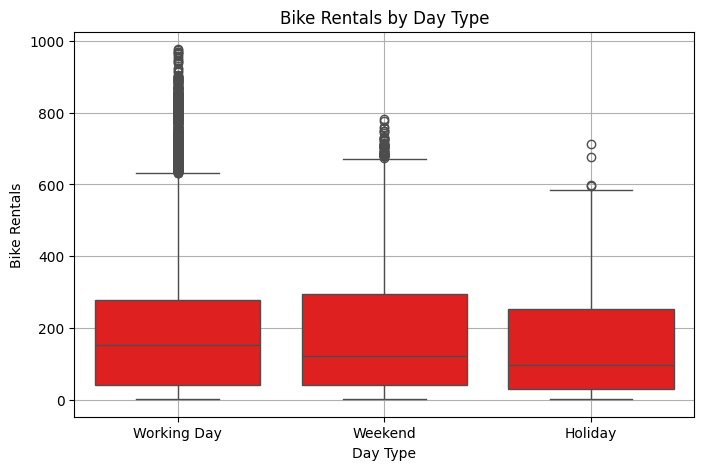

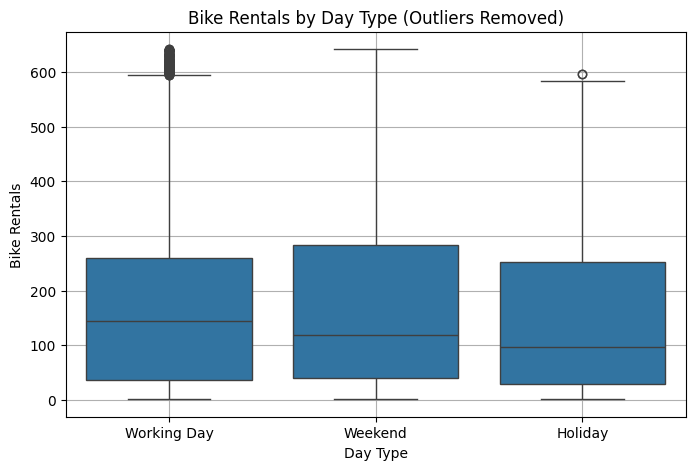

In [82]:
# Create a new column to categorize days
datat['day_type'] = datat.apply(
    lambda row: 'Working Day' if row['workingday'] == 1 else ('Holiday' if row['holiday'] == 1 else 'Weekend'),
    axis=1
)

# Check the distribution of day types
print(datat['day_type'].value_counts())
# Rentals by day type
dayTypeBox(datat)
dayTypeBoxNoOutlier(datat)


###### The boxplots (with and without outliers) provide insights into the distribution of bike rentals across different day types (`Working Day`, `Weekend`, and `Holiday`).

###### Boxplot with Outliers: Highlights the full range of data, including extreme values. Working days show the highest rentals, driven by commuting patterns, with many high outliers likely due to peak hours or special events. Weekends and holidays have fewer outliers, indicating more consistent rental behavior.

###### Boxplot Without Outliers: Focuses on the central trends by removing extreme values. Confirms that working days have the highest median rentals, followed by weekends and holidays. Reduces variability, making it easier to compare typical rental patterns.

###### Key Insights: Rentals are highest on working days, driven by commuting, with high variability. Weekends see moderate rentals, likely driven by leisure activities, with more consistent behavior. Holidays have the lowest rentals, with fewer outliers and predictable patterns.

###### Actionable Insights: Optimize bike availability during commuting hours on working days. Ensure sufficient bikes in recreational areas on weekends. Plan for moderate demand on holidays, as rentals are lower and more consistent.

In [83]:
# Separate bike rentals by day type
working_day_rentals = datat[datat['day_type'] == 'Working Day']['cnt']
weekend_rentals = datat[datat['day_type'] == 'Weekend']['cnt']
holiday_rentals = datat[datat['day_type'] == 'Holiday']['cnt']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(working_day_rentals, weekend_rentals, holiday_rentals)

print(f"P-value: {p_value:.8f}")

# Interpretation
if p_value < 0.05:
    print("The differences in bike rentals across day types are statistically significant.")
else:
    print("The differences in bike rentals across day types are not statistically significant.")



P-value: 0.00000224
The differences in bike rentals across day types are statistically significant.


##### Average rentals by hour for holidays vs non-holidays

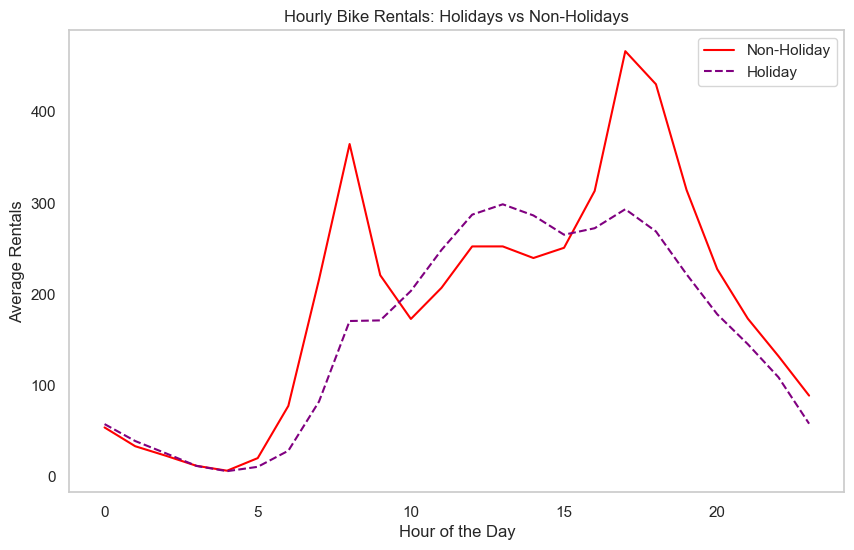

In [107]:
hourly_holiday = datat.groupby(['hr', 'holiday'])['cnt'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_holiday[hourly_holiday['holiday'] == 0], color='red', label='Non-Holiday', linestyle='-')
sns.lineplot(x='hr', y='cnt', data=hourly_holiday[hourly_holiday['holiday'] == 1], color='purple', label='Holiday', linestyle='--')

plt.title('Hourly Bike Rentals: Holidays vs Non-Holidays')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.legend()  # Let Seaborn handle the legend automatically
plt.grid()
plt.show()


###### Morning Peak (Non-Holidays): On non-holidays, there is a sharp increase in bike rentals during the morning hours (around 7–9 AM), likely due to people commuting to work or school.
###### Evening Peak (Non-Holidays):Another peak is observed in the evening (around 5–7 PM), which aligns with people returning home from work or school.
###### Holidays:On holidays, the pattern is more spread out, with rentals gradually increasing throughout the day and peaking in the afternoon (around 2–4 PM). This suggests more leisure-oriented usage.
###### Lower Rentals Early Morning and Late Night:Both holidays and non-holidays show very low rentals during late-night and early-morning hours (12 AM–5 AM), which is expected.

In [85]:
holiday_rentals = datat[datat['holiday'] == 1]['cnt']
non_holiday_rentals = datat[datat['holiday'] == 0]['cnt']

t_stat, p_value = ttest_ind(holiday_rentals, non_holiday_rentals, equal_var=False)
print(f"P-value: {p_value:.7f}")

# what is understood
if p_value < 0.05:
    print("The difference in bike rentals between holidays and non-holidays is statistically significant.")
else:
    print("The difference in bike rentals between holidays and non-holidays is not statistically significant.")

P-value: 0.0000034
The difference in bike rentals between holidays and non-holidays is statistically significant.


## Conclusion

This notebook provided an exploratory analysis of the `day.csv` and `hour.csv` datasets. We visualized distributions, correlations, and identified potentially irrelevant columns based on correlation thresholds.